In [1]:
import numpy as np
import matplotlib.pyplot as plt

from morris_lecar import MorrisLecar

In [2]:
T = 100
dt = 4e-2

t = np.arange(0, T, dt)

x = np.sin(2 * 5 * np.pi * t / 1000)
x = x.reshape(-1, 1)

In [3]:
def z_transform(signal):
    return (signal - signal.mean(axis=0)) / signal.std(axis=0)

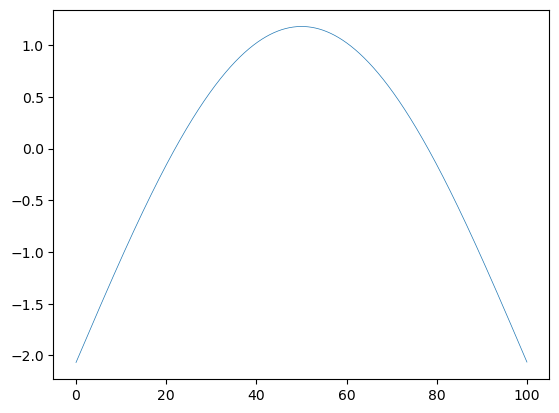

In [4]:
signal = z_transform(x)

plt.plot(t, signal[:, 0], lw=.5)
plt.show()

In [5]:
model = MorrisLecar(supervisor=signal, T=T, dt=dt)
model.v = -50 + 20 * np.random.uniform(size=(model._N, 1))
print(model.E.shape)

(1000, 1000)


In [6]:
random_neurons, voltage_trace = model.render(n_neurons=10)

  1%|          | 25/2500 [00:00<01:14, 33.24it/s]

100%|██████████| 2500/2500 [01:08<00:00, 36.38it/s]


In [8]:
random_neurons

array([253, 555,  96, 755, 589, 458, 422, 630, 297, 629])

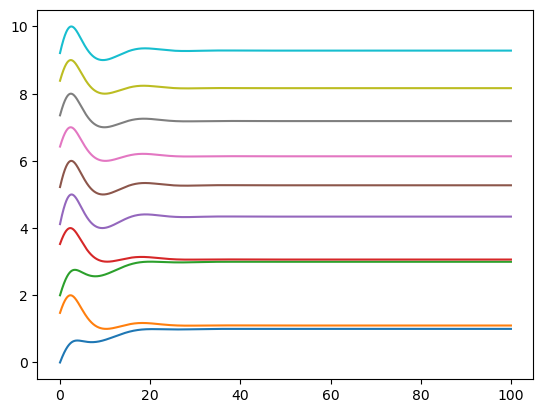

In [9]:
fig, ax = plt.subplots()
for i in range(len(random_neurons)):
    signal = voltage_trace[:, i]
    minim = np.min(signal)
    maxim = np.max(signal)
    signal = (signal - minim) / (maxim - minim) + i
    ax.plot(t, signal)
plt.show()